# IMO Results

The goal of this notebook is to analyze the [International Mathematical Olynpiad (IMO)](https://www.imo-official.org/) data to answer the question "How is women participation in IMO?". Also, we try to answer the question "Which are the countries that obtained the best results at IMO 2019?".

## Methodology

The data was scrapped from the [IMO](https://www.imo-official.org) website. It contains three datasets: Timeline, Results, and Countries. This analysis focuses on female participation to the IMO.

In [128]:
# Import libraries
import pandas as pd

import plotly.express as px

In [129]:
#Import datasets
timeline = pd.read_csv("data/timeline.csv")
results = pd.read_csv("data/results.csv")
countries = pd.read_csv("data/countries.csv")

In [130]:
timeline.head()

,#,Year,Country,City,Date,Countries,All,M,F
0,66,2025,Australia,Melbourne,NaN,NaN,NaN,NaN,NaN
1,64,2023,Japan,Chiba,2.7. - 13.7.,NaN,NaN,NaN,NaN
2,63,2022,Norway,Oslo,6.7. - 16.7.,NaN,NaN,NaN,NaN
3,61,2020,Russian Federation,St. Petersburg,19.9. - 28.9.,NaN,NaN,NaN,NaN
4,60,2019,United Kingdom,Bath,11.7. - 22.7.,112.0,621.0,556.0,65.0


In [131]:
results.head()

,Year,19,18,17,16,15,14,13,12,11,...,68,67,66,65,64,63,62,61,60,59
0,AGO,110.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ALB,80.0,79.0,76.0,69.0,77.0,77.0,NaN,NaN,88.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ALG,77.0,92.0,73.0,82.0,62.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ARG,53.0,39.0,26.0,57.0,52.0,56.0,67.0,54.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ARM,49.0,32.0,41.0,30.0,26.0,39.0,40.0,47.0,67.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [132]:
countries.head()

,Code,Country
0,AFG,Afghanistan
1,ALB,Albania
2,ALG,Algeria
3,AGO,Angola
4,ARG,Argentina


## Female Participation to IMO

First, we want to see how the overall female participation to IMO. Before we do that, we need to see the range of years in the dataset.

In [133]:
timeline['Year'].describe()

count      64.000000
mean     1991.234375
std        19.111820
min      1959.000000
25%      1974.750000
50%      1991.500000
75%      2007.250000
max      2025.000000
Name: Year, dtype: float64

In [134]:
timeline.head()

,#,Year,Country,City,Date,Countries,All,M,F
0,66,2025,Australia,Melbourne,NaN,NaN,NaN,NaN,NaN
1,64,2023,Japan,Chiba,2.7. - 13.7.,NaN,NaN,NaN,NaN
2,63,2022,Norway,Oslo,6.7. - 16.7.,NaN,NaN,NaN,NaN
3,61,2020,Russian Federation,St. Petersburg,19.9. - 28.9.,NaN,NaN,NaN,NaN
4,60,2019,United Kingdom,Bath,11.7. - 22.7.,112.0,621.0,556.0,65.0


In [135]:
timeline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   #          64 non-null     int64  
 1   Year       64 non-null     int64  
 2   Country    64 non-null     object 
 3   City       64 non-null     object 
 4   Date       63 non-null     object 
 5   Countries  60 non-null     float64
 6   All        60 non-null     float64
 7   M          60 non-null     float64
 8   F          59 non-null     float64
dtypes: float64(4), int64(2), object(3)
memory usage: 4.6+ KB


The earliest record of IMO dates back to 1959 and the latest is 2025. However, the last IMO event was held in 2019 so for this analysis we'll concentrate on years 1959 to 2019.

In [136]:
#We fill in the missing values
timeline.fillna(0, inplace=True)

#Add the Unknown Gender column
timeline['Unknown_Gender'] = timeline.All - (timeline.F + timeline.M)

In [137]:
timeline = timeline[timeline['Year'] < 2020]

In [138]:
imo_participation_2019 = timeline[timeline.Year == 2019]

The following plot shows the gender distribution in the 2019 IMO.

In [139]:
imo_participation_2019 = imo_participation_2019[['M', 'F']] 
imo_participation_2019 = pd.melt(imo_participation_2019)

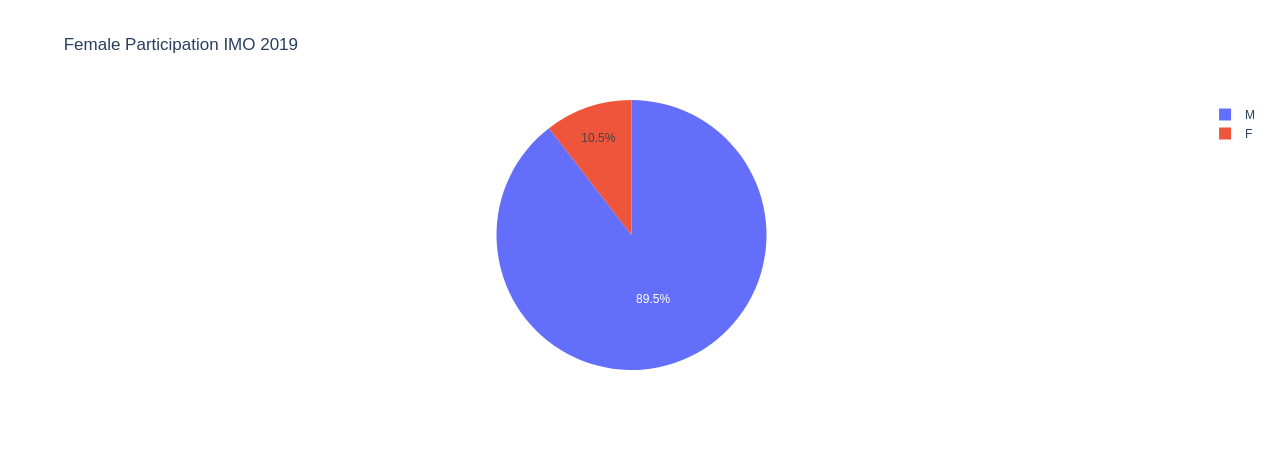

In [140]:
fig = px.pie(imo_participation_2019, values='value', names='variable', title='Female Participation IMO 2019')
fig.show()

The female paticipation to IMO 2019 was about 10% but how does it compare to previous years?

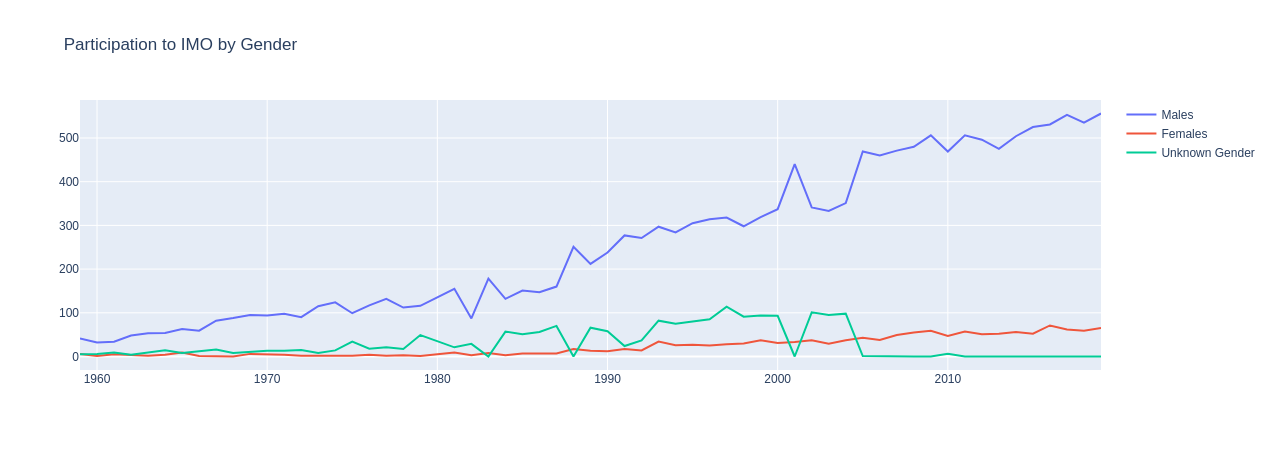

In [141]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=timeline['Year'], y=timeline['M'],
                    mode='lines',
                    name='Males'))

fig.add_trace(go.Scatter(x=timeline['Year'], y=timeline['F'],
                    mode='lines',
                    name='Females'))

fig.add_trace(go.Scatter(x=timeline['Year'], y=timeline['Unknown_Gender'],
                    mode='lines',
                    name='Unknown Gender'))

fig.update_layout(title='Participation to IMO by Gender')

fig.show()

Female participation to IMO is increasing very slowly. Before 2005, IMO did not register the gender of all particpantes. Some of them might have been women but unfortunately we can't tell for sure.

## Countries

Now, we analyze the results by Country. 

In [142]:
results.rename(columns={'Year': 'Country'}, inplace=True)
results.head()

,Country,19,18,17,16,15,14,13,12,11,...,68,67,66,65,64,63,62,61,60,59
0,AGO,110.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ALB,80.0,79.0,76.0,69.0,77.0,77.0,NaN,NaN,88.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ALG,77.0,92.0,73.0,82.0,62.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ARG,53.0,39.0,26.0,57.0,52.0,56.0,67.0,54.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ARM,49.0,32.0,41.0,30.0,26.0,39.0,40.0,47.0,67.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [143]:
countries_dict = dict(zip(countries.Code, countries.Country))
results['Country_Name'] = results['Country'].map(countries_dict)

In [144]:
results.head()

,Country,19,18,17,16,15,14,13,12,11,...,67,66,65,64,63,62,61,60,59,Country_Name
0,AGO,110.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Angola
1,ALB,80.0,79.0,76.0,69.0,77.0,77.0,NaN,NaN,88.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Albania
2,ALG,77.0,92.0,73.0,82.0,62.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Algeria
3,ARG,53.0,39.0,26.0,57.0,52.0,56.0,67.0,54.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Argentina
4,ARM,49.0,32.0,41.0,30.0,26.0,39.0,40.0,47.0,67.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Armenia


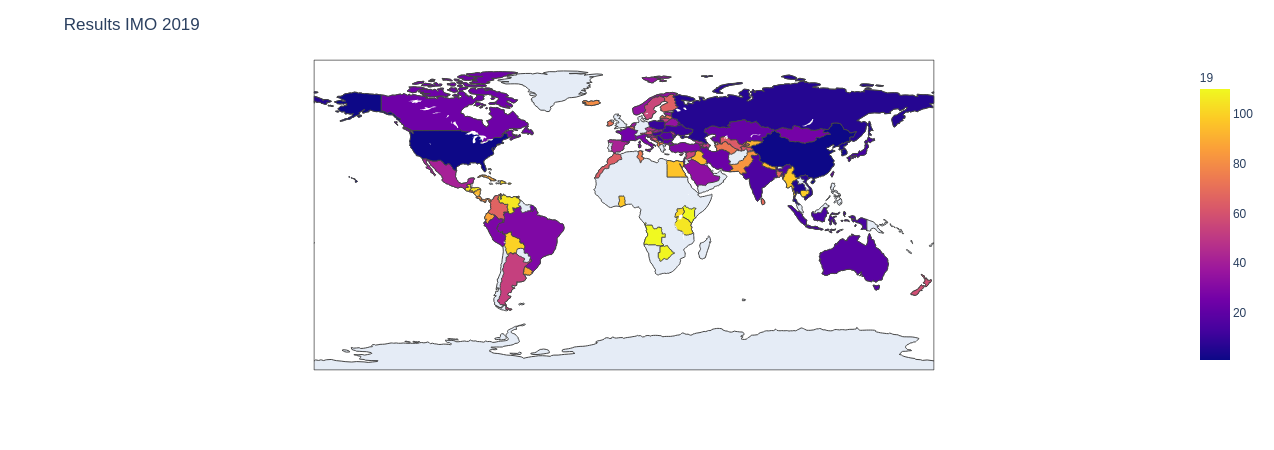

In [147]:
fig = px.choropleth(results, locations="Country",
                    color="19", # lifeExp is a column of gapminder
                    hover_name="Country_Name", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.update_layout(title='Results IMO 2019')
fig.show()